In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing=pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

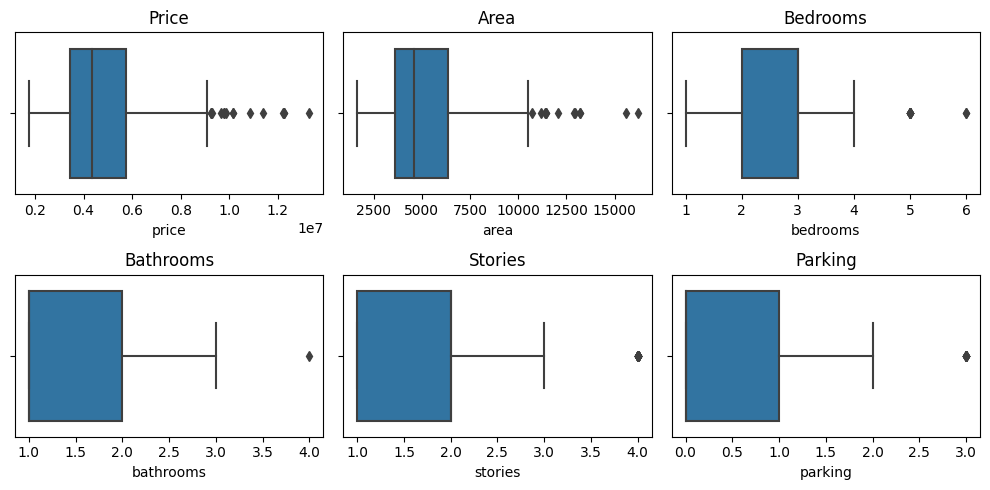

In [9]:


fig, axs = plt.subplots(2, 3, figsize=(10, 5))


sns.boxplot(x=housing['price'], ax=axs[0, 0])
sns.boxplot(x=housing['area'], ax=axs[0, 1])
sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
sns.boxplot(x=housing['stories'], ax=axs[1, 1])
sns.boxplot(x=housing['parking'], ax=axs[1, 2])

# Add titles to each subplot
axs[0, 0].set_title('Price')
axs[0, 1].set_title('Area')
axs[0, 2].set_title('Bedrooms')
axs[1, 0].set_title('Bathrooms')
axs[1, 1].set_title('Stories')
axs[1, 2].set_title('Parking')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


## Outlier treatment using InterQuartileRange (IQR)

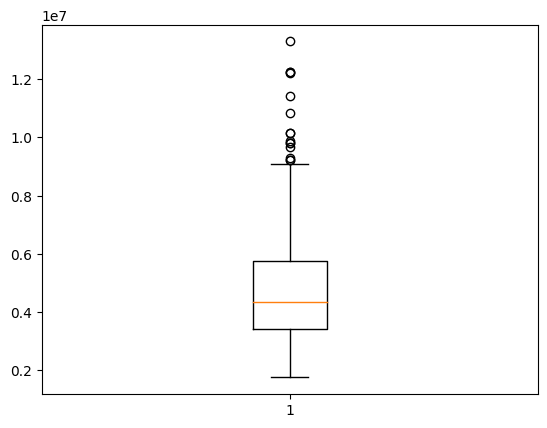

In [10]:
plt.boxplot(housing.price)
Q1=housing.price.quantile(0.25)
Q3=housing.price.quantile(0.75)
IQR=Q3-Q1
housing=housing[(housing.price>=Q1-1.5*IQR) & (housing.price<=Q3+1.5*IQR)]


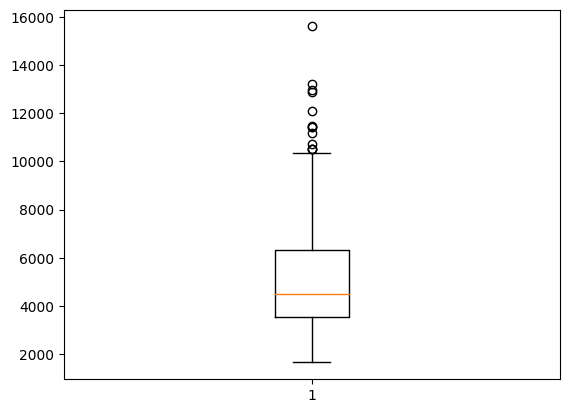

In [11]:
plt.boxplot(housing.area)
Q1=housing.area.quantile(0.25)
Q3=housing.area.quantile(0.75)
IQR=Q3-Q1
housing=housing[(housing.area>=Q1-1.5*IQR) & (housing.area<=Q3+1.5*IQR)]


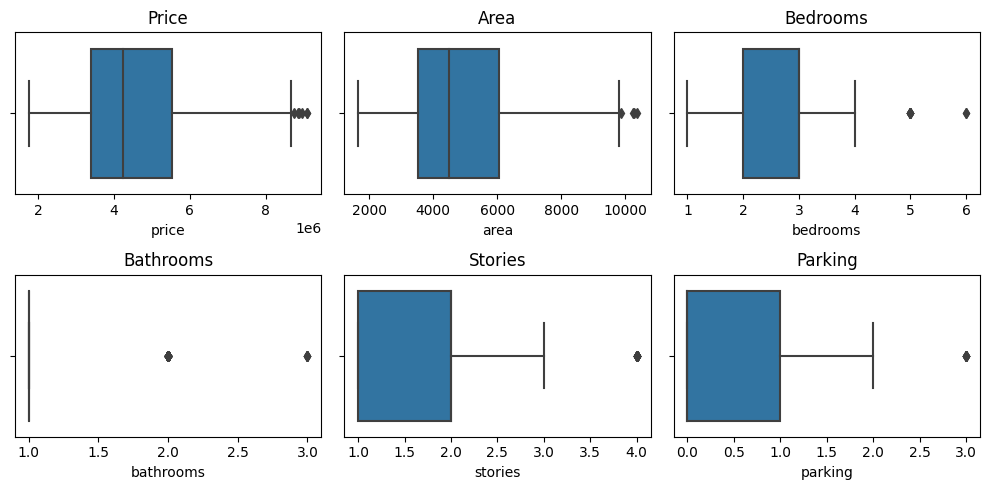

In [12]:


fig, axs = plt.subplots(2, 3, figsize=(10, 5))


sns.boxplot(x=housing['price'], ax=axs[0, 0])
sns.boxplot(x=housing['area'], ax=axs[0, 1])
sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
sns.boxplot(x=housing['stories'], ax=axs[1, 1])
sns.boxplot(x=housing['parking'], ax=axs[1, 2])

# Add titles to each subplot
axs[0, 0].set_title('Price')
axs[0, 1].set_title('Area')
axs[0, 2].set_title('Bedrooms')
axs[1, 0].set_title('Bathrooms')
axs[1, 1].set_title('Stories')
axs[1, 2].set_title('Parking')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

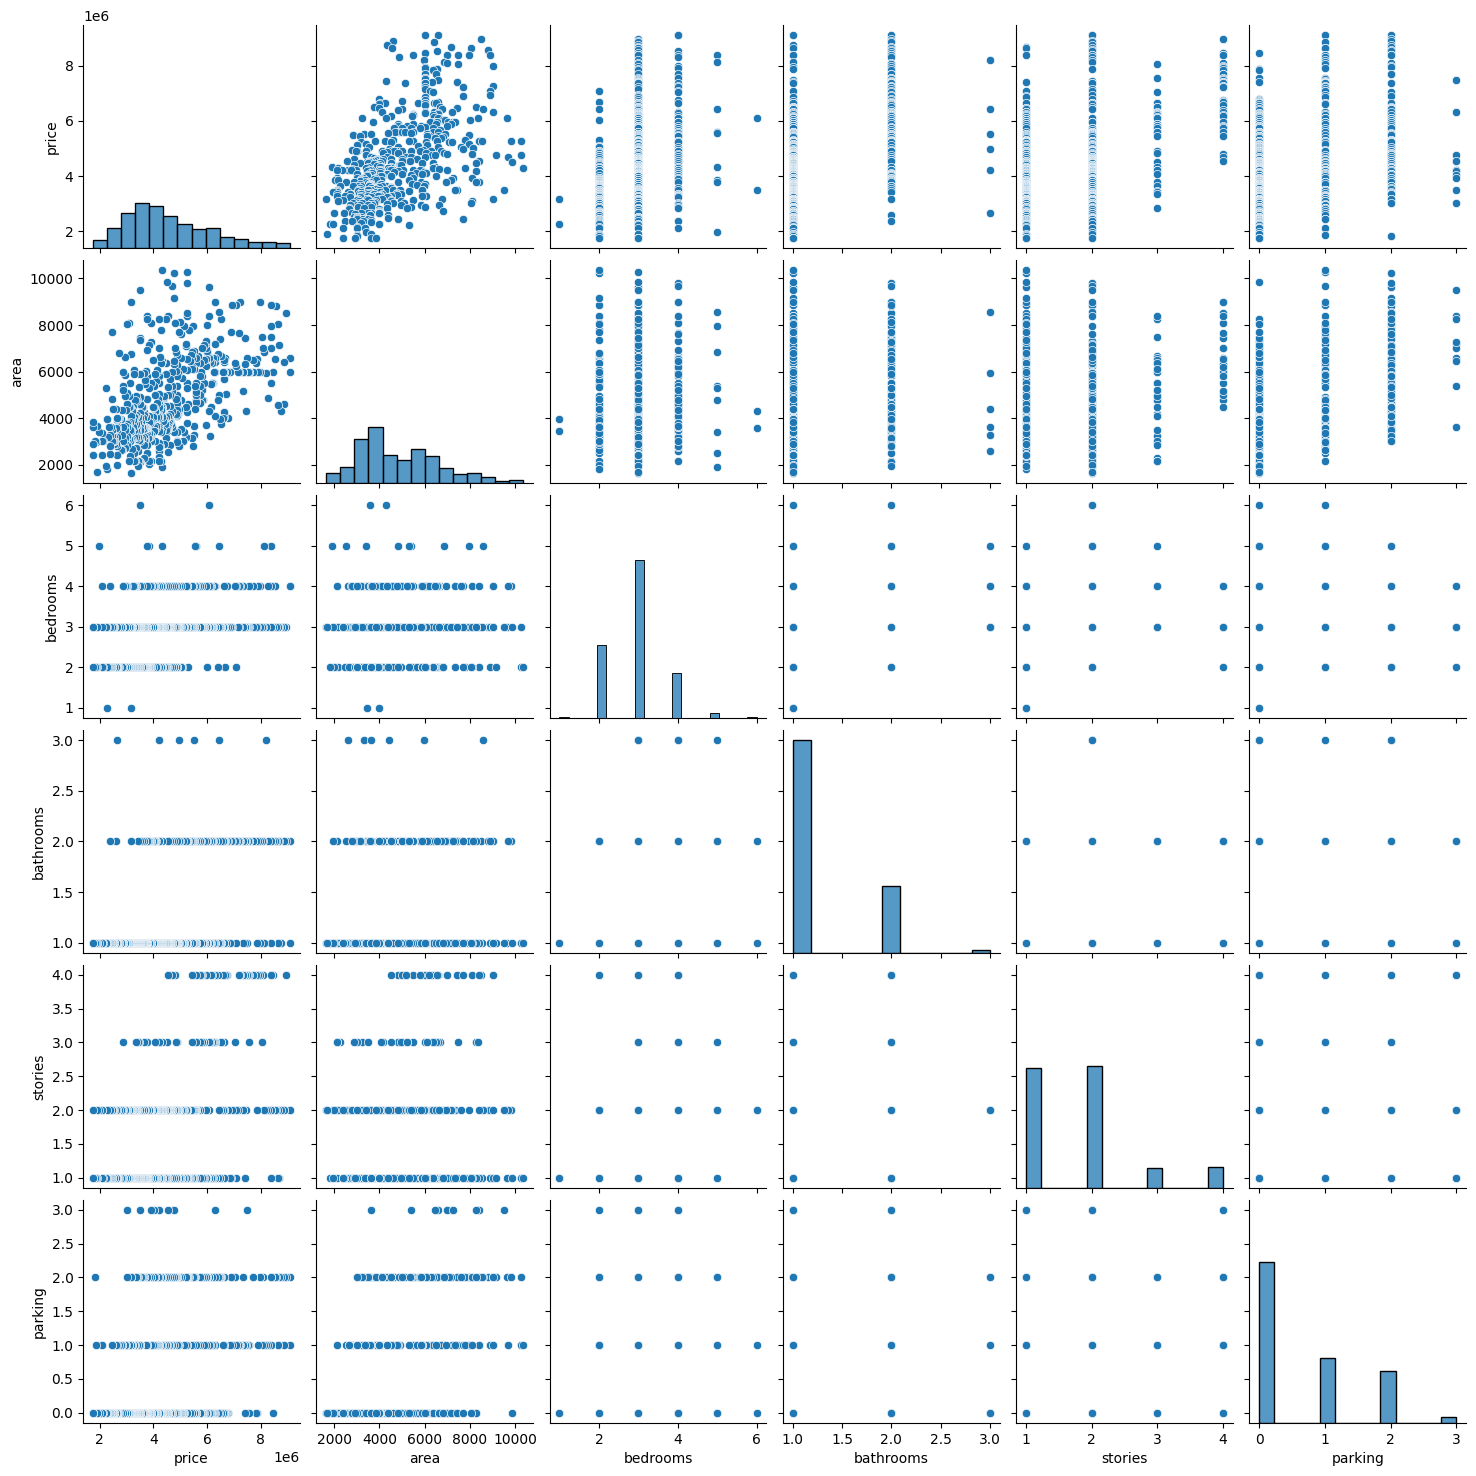

In [13]:
sns.pairplot(housing)
plt.show()

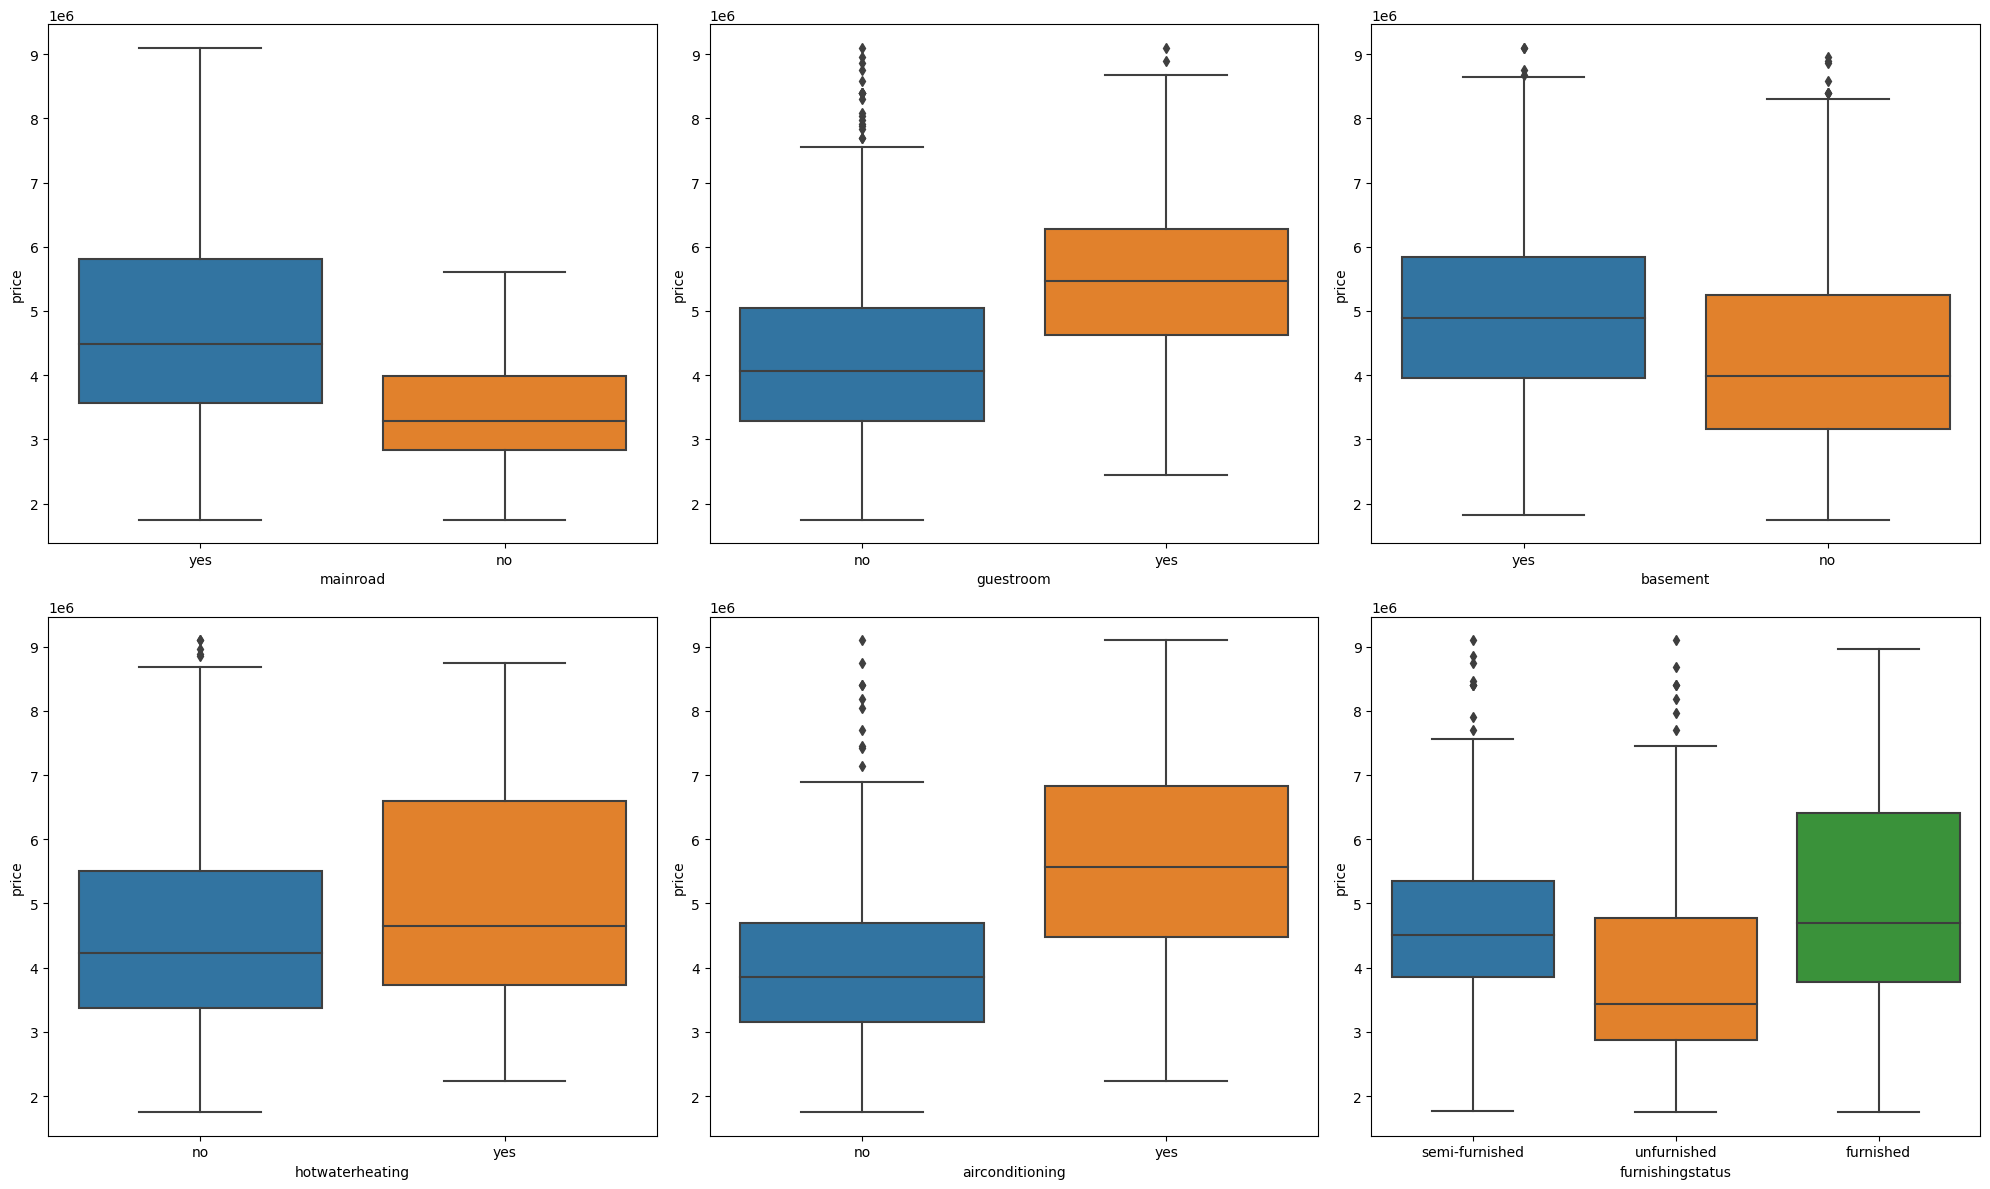

In [14]:
fig,axs=plt.subplots(2,3,figsize=(20,12))
sns.boxplot(x=housing['mainroad'],y=housing['price'],ax=axs[0,0])
sns.boxplot(x=housing['guestroom'],y=housing['price'],ax=axs[0,1])
sns.boxplot(x=housing['basement'],y=housing['price'],ax=axs[0,2])
sns.boxplot(x=housing['hotwaterheating'],y=housing['price'],ax=axs[1,0])
sns.boxplot(x=housing['airconditioning'],y=housing['price'],ax=axs[1,1])
sns.boxplot(x=housing['furnishingstatus'],y=housing['price'],ax=axs[1,2])
plt.tight_layout()
plt.show()


In [15]:
#same as above code but different style
'''
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()
'''

"\nplt.figure(figsize=(20, 12))\nplt.subplot(2,3,1)\nsns.boxplot(x = 'mainroad', y = 'price', data = housing)\nplt.subplot(2,3,2)\nsns.boxplot(x = 'guestroom', y = 'price', data = housing)\nplt.subplot(2,3,3)\nsns.boxplot(x = 'basement', y = 'price', data = housing)\nplt.subplot(2,3,4)\nsns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)\nplt.subplot(2,3,5)\nsns.boxplot(x = 'airconditioning', y = 'price', data = housing)\nplt.subplot(2,3,6)\nsns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)\nplt.show()\n"

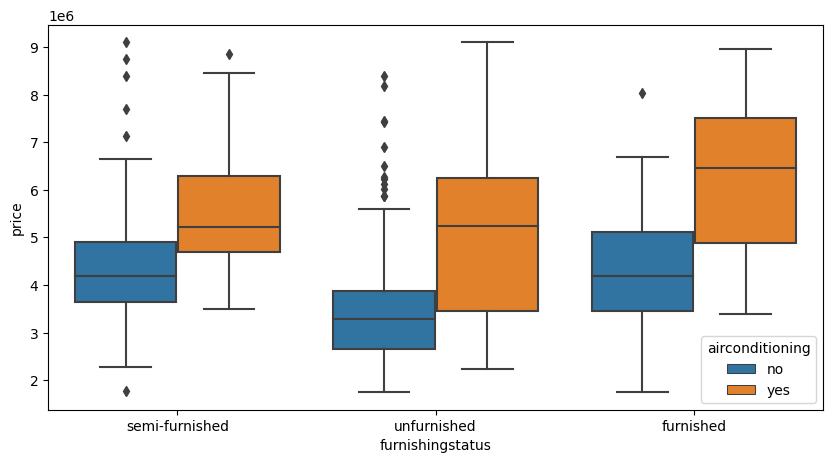

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=housing)
plt.show()

In [17]:
'''
varlist =  ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
yes_no_map={'yes':1,'no':0}
for i in range(len(varlist)):
    housing[varlist[i]]=housing[varlist[i]].map(yes_no_map)
'''

"\nvarlist =  ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']\nyes_no_map={'yes':1,'no':0}\nfor i in range(len(varlist)):\n    housing[varlist[i]]=housing[varlist[i]].map(yes_no_map)\n"

In [18]:
#Alternative


varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)


In [19]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [20]:
status=pd.get_dummies(housing["furnishingstatus"])

In [21]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [22]:
for column in status.columns:
    if status[column].dtype=='bool':
        status[column]=status[column].astype(int)
        

In [23]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [24]:
status.drop(["furnished"],axis=1,inplace=True)

In [25]:
housing=pd.concat([status,housing],axis=1)

In [26]:
housing.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1,0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,0,1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,0,0,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,0,0,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,1,0,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [27]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [28]:
housing.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,1,0,9100000,6000,4,1,2,1,0,1,0,0,2,0
16,0,1,9100000,6600,4,2,2,1,1,1,0,1,1,1
17,0,0,8960000,8500,3,2,4,1,0,0,0,1,2,0
18,0,0,8890000,4600,3,2,2,1,1,0,0,1,2,0
19,1,0,8855000,6420,3,2,2,1,0,0,0,1,1,1


In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing,test_size=0.3,random_state=100)


## Rescaling
Area has very large integer values compared to other variables hence we need to rescale

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [31]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
148,1,0,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1
236,1,0,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1
356,0,0,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0
425,0,0,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0
516,0,1,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0


In [33]:
df_train.describe()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.476454,0.304709,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.500138,0.460923,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


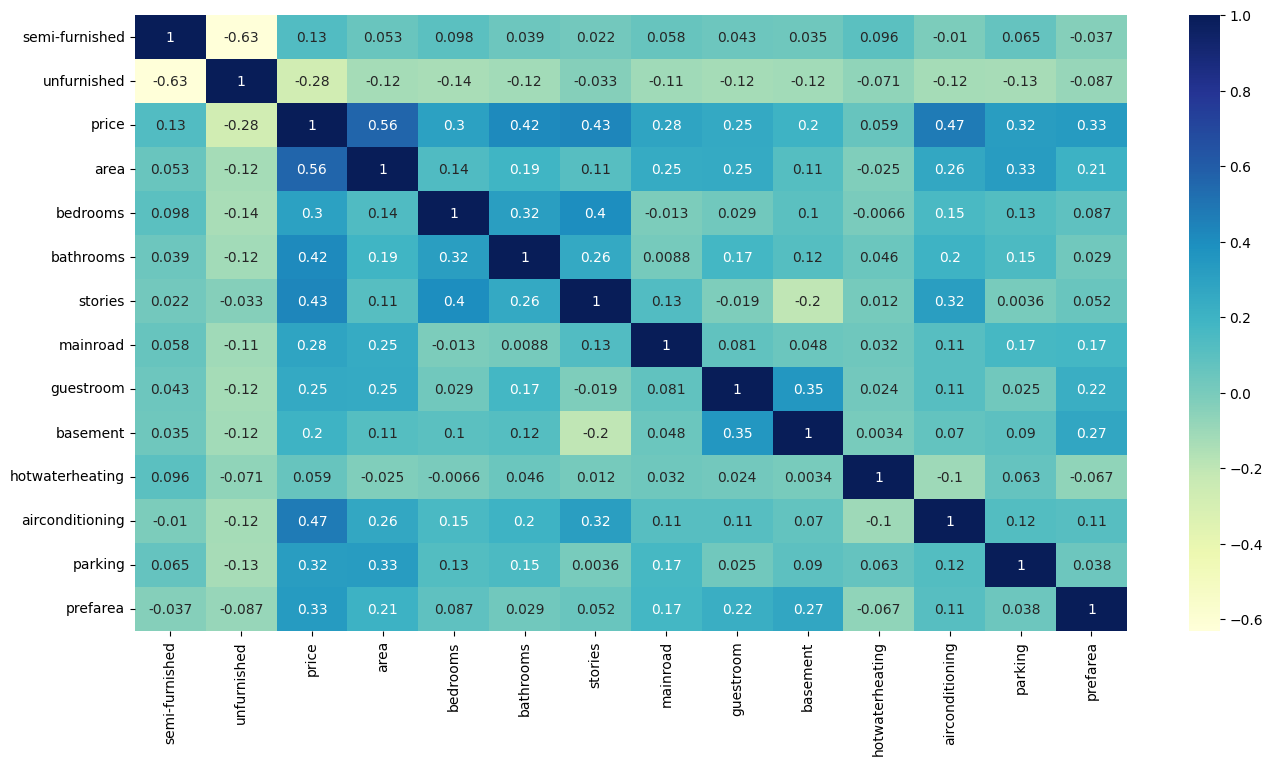

In [34]:
corr=df_train.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot = True, cmap="YlGnBu")
plt.show()

In [35]:
y_train=df_train.pop('price')
X_train=df_train

In [36]:
y_train.head()

148    0.523810
236    0.390476
356    0.275238
425    0.219048
516    0.095238
Name: price, dtype: float64

## Model Building

## RFE
Recursive Feature Elimination (RFE) is a feature selection method used in machine learning to identify the most significant features affecting the predictive performance of a model. It works by recursively removing features and building a model on the features that remain. This process helps in optimizing the model's performance by eliminating less important or redundant features.

How Recursive Feature Elimination Works:
Model Training: RFE requires a model that can provide some measure of importance for each feature. This is typically a model with coefficient attributes, such as linear regression, logistic regression, or any other that ranks features based on their importance or impact.

Feature Ranking:

Initially, the model is trained on all available features.
Based on the model used, each feature is assigned a weight or coefficient, indicating its importance.
Feature Elimination Process:

The least important features (based on their weights or coefficients) are removed from the current set of features.
The model is retrained on the reduced set of features, and the process is repeated.
This recursion continues until a specified number of features are left, or some other stopping criterion is met.
Optimal Feature Set:

The features that remain are considered the most important by this method and are supposed to be the best set that maximizes the performance of the model according to the criteria set.
Implementation in Scikit-Learn:
In Python's Scikit-Learn library, RFE can be implemented using the RFE or RFECV classes. RFECV extends RFE by adding cross-validation, which helps in determining the optimal number of features in an automated way.

Here is a basic example of using RFE with a logistic regression model:

python
Copy code
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

Initialize the model
model = LogisticRegression()

Initialize RFE with the model and desired number of features
rfe = RFE(estimator=model, n_features_to_select=2)

Fit RFE
rfe.fit(X, y)

Boolean mask of selected features
print('Selected features:', rfe.support_)

Ranking of features, 1 means selected
print('Feature Ranking:', rfe.ranking_)
Benefits of RFE:
Model Simplicity: Reduces the complexity of the model by removing unnecessary features.
Performance Improvement: Can improve model performance by eliminating misleading or irrelevant features.
Interpretability: Fewer features make the model easier to interpret and understand.
Use Cases:
High Dimensional Data: Especially useful in scenarios where the number of features is very high compared to the number of observations.
Ensuring Model Robustness: Helps in avoiding overfitting by reducing the number of features.
Limitations:
Computationally Intensive: The recursive nature of RFE can make it computationally expensive, especially with large datasets and complex models.
Dependent on Initial Model: The effectiveness of RFE depends highly on the model used for feature ranking. Poor initial model choices can lead to suboptimal feature selection.
RFE is a powerful tool in feature engineering, especially when you need to deal with datasets where feature reduction is necessary for model performance or interpretability.








In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [38]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
rfe=RFE(estimator=lm,n_features_to_select=6)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('semi-furnished', False, 8),
 ('unfurnished', False, 3),
 ('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1)]

In [41]:
col=X_train.columns[rfe.support_]
print(col)

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')


In [42]:
X_train_rfe=X_train[col]

In [43]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [44]:
y_train.count

<bound method Series.count of 148    0.523810
236    0.390476
356    0.275238
425    0.219048
516    0.095238
         ...   
255    0.371429
307    0.328571
72     0.676190
377    0.257143
99     0.614286
Name: price, Length: 361, dtype: float64>

In [45]:
lm=sm.OLS(y_train,X_train_rfe).fit()
lm

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.31e-69
Time:                        22:12:43   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif=pd.DataFrame()
X=X_train_rfe
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [49]:
X_train_rfe.count

<bound method DataFrame.count of      const      area  bathrooms   stories  airconditioning   parking  prefarea
148    1.0  0.526907        0.0  0.666667                0  0.000000         1
236    1.0  0.114134        0.0  0.333333                0  0.000000         1
356    1.0  0.072738        0.5  0.000000                1  0.333333         0
425    1.0  0.151390        0.0  0.000000                0  0.666667         0
516    1.0  0.157895        0.0  0.000000                0  0.333333         0
..     ...       ...        ...       ...              ...       ...       ...
255    1.0  0.470727        0.0  0.000000                1  0.333333         0
307    1.0  0.257244        0.0  0.333333                0  0.666667         0
72     1.0  0.368421        0.0  1.000000                1  0.000000         1
377    1.0  0.111768        0.5  0.333333                0  0.000000         1
99     1.0  0.484329        0.0  0.666667                0  0.000000         1

[361 rows x 7 colu

In [50]:


y_train_price = lm.predict(X_train_rfe)


In [51]:
y_train_price.head()

148    0.529984
236    0.322657
356    0.365862
425    0.229987
516    0.198615
dtype: float64

/tmp/ipykernel_17/2652243710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

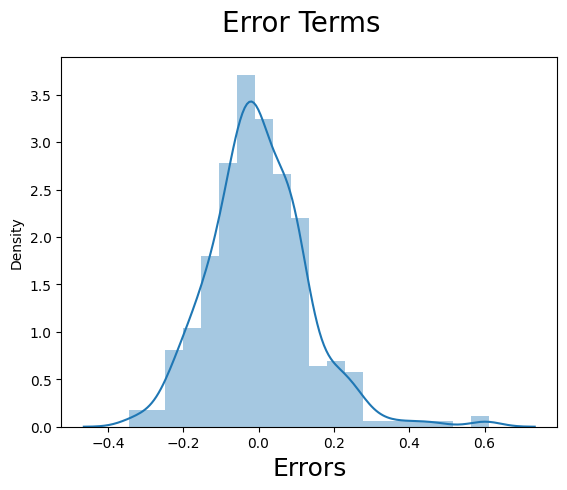

In [52]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                 

## Model Evaluation

In [53]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [54]:
df_test.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
244,1,0,4550000,5320,3,1,2,1,1,1,0,0,0,1
287,0,1,4200000,5500,3,1,2,1,0,0,0,1,0,0
166,0,1,5320000,7800,3,1,1,1,0,1,0,1,2,1
176,0,0,5250000,8520,3,1,1,1,0,0,0,1,2,0
282,0,1,4270000,2175,3,1,2,0,1,1,0,1,0,0


In [55]:
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [56]:
y_test=df_test.pop('price')
X_test=df_test

In [57]:
X_test = sm.add_constant(X_test)

In [58]:
X_test_rfe=X_test[X_train_rfe.columns]

In [59]:
y_pred=lm.predict(X_test_rfe)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5791247774397739

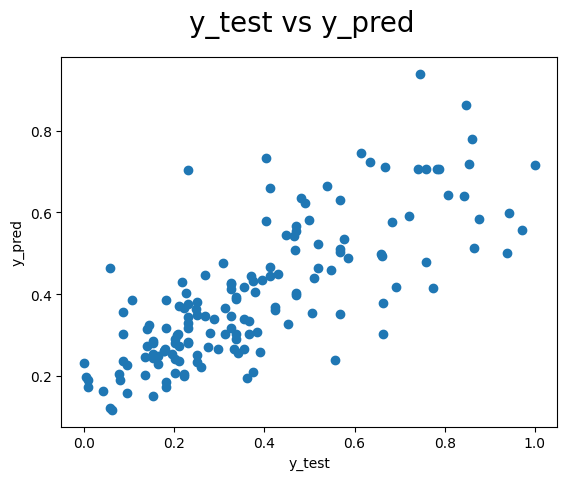

In [61]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
